In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
#Carga datos
def load_data():
    df = pd.read_csv('../files/input/shipping-data.csv')
    return df

load_data().head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


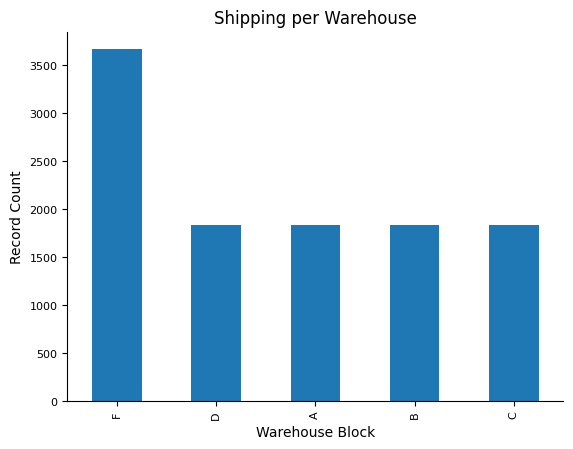

In [3]:
#Visual for shipping per warehouse
def create_visual_for_shipping_per_warehouse(df):
    
    df = df.copy()

    plt.figure()
    
    counts = df.Warehouse_block.value_counts()

    counts.plot.bar(
        title='Shipping per Warehouse',
        xlabel='Warehouse Block',
        ylabel='Record Count',
        color = "tab:blue",
        fontsize = 8
    )

    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    os.makedirs(os.path.dirname("../docs/shipping_per_warehouse.png"), exist_ok=True) #crear carpeta docs
    plt.savefig("../docs/shipping_per_warehouse.png")

df = load_data()
create_visual_for_shipping_per_warehouse(df)

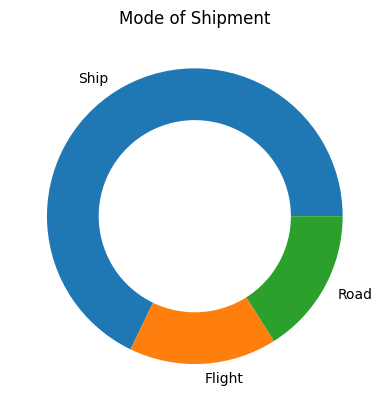

In [4]:
# Visual for mode shipment

def create_visual_for_mode_of_shipment(df):

    df = df.copy()

    plt.figure()

    counts = df.Mode_of_Shipment.value_counts()
    counts.plot.pie(
        title = "Mode of Shipment",
        wedgeprops = dict(width = 0.35),
        ylabel = "",
        colors = ["tab:blue", "tab:orange", "tab:green"],
    )

    os.makedirs(os.path.dirname("../docs/mode_of_shipment.png"), exist_ok=True)
    plt.savefig("../docs/mode_of_shipment.png")
    plt.show()
    
df = load_data()
create_visual_for_mode_of_shipment(df)

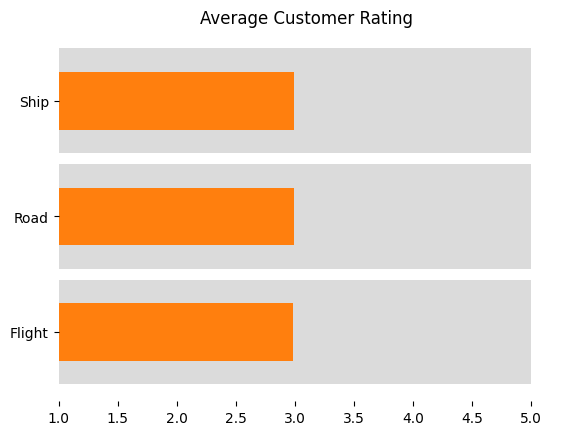

In [5]:
# Visual for average customer rating

def create_visual_for_average_customer_rating(df):

    df = df.copy()

    plt.figure()

    df = (
        df[["Mode_of_Shipment", "Customer_rating"]]
        .groupby("Mode_of_Shipment")
        .describe()
    )
    df.columns = df.columns.droplevel()
    df = df[["mean", "min", "max",]]
    plt.barh(
        y = df.index.values,
        width = df["max"].values -1,
        left = df["min"].values,
        height = 0.9,
        color = "lightgray",
        alpha = 0.8,
    )
    colors = [
        "tab:green" if value >= 3.0 else "tab:orange" for value in df["mean"].values
    ]
    plt.barh(
        y = df.index.values,
        width = df["mean"].values -1,
        left = df["min"].values,
        color = colors,
        height = 0.5,
        alpha = 1.0,
    )
    plt.title("Average Customer Rating")
    plt.gca().spines["left"].set_visible(False)
    plt.gca().spines["bottom"].set_visible(False)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    
    os.makedirs(os.path.dirname("../docs/average_customer_rating.png"), exist_ok=True)
    plt.savefig("../docs/average_customer_rating.png")
    plt.show()
    
df = load_data()
create_visual_for_average_customer_rating(df)

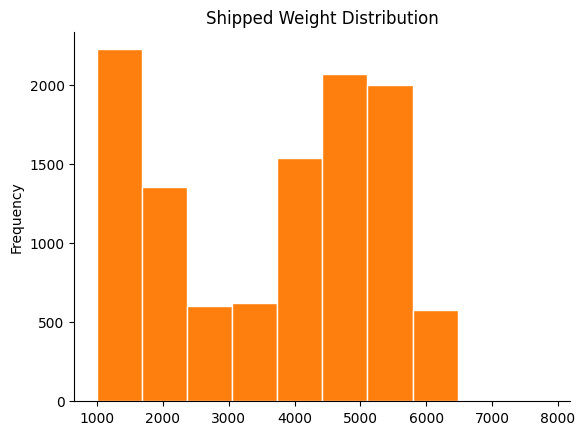

In [6]:
#Visual for weight distribution

def create_visual_for_weight_distribution(df):
    df = df.copy()
    plt.figure()
    df.Weight_in_gms.plot.hist(
        title = "Shipped Weight Distribution",
        color = "tab:orange",
        edgecolor = "white",
    )
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    os.makedirs(os.path.dirname("../docs/weight_distribution.png"), exist_ok=True)
    plt.savefig("../docs/weight_distribution.png")
    plt.show()

df = load_data()
create_visual_for_weight_distribution(df)

In [7]:
%%writefile ../docs/index.html

<!DOCTYPE html>
<html>
    <body>
        <h1>Shipping Dashboard Example</h1>
        <div style = "width: 45%; float: left">
            <img src="shipping_per_warehouse.png" alt="Fig 1">
            <img src= "mode_of_shipment.png" alt="Fig 2">
        </div>
        <div style = "width: 45%; float: left">
            <img src="average_customer_rating.png" alt="Fig 3">
            <img src="weight_distribution.png" alt="Fig 4">
        </div>
    </body>
</html>

Writing ../docs/index.html
